In [349]:
import pandas as pd
import matplotlib.pyplot as plt

In [350]:
raw_data=pd.read_csv("medical_students_dataset.csv")
raw_data.sort_values("Student ID",inplace=True)
raw_data.head(10)


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
100001,2.0,34.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
100003,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
100004,5.0,23.0,Female,179.339293,46.234173,O,14.375143,98.480008,95.0,139.0,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
100005,6.0,32.0,Female,NaN,NaN,B,29.912403,99.668373,70.0,128.0,183.0,No,Yes
6,7.0,21.0,NaN,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No


as you can see data includes null values and dublicates.


In [351]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199995
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 21.4+ MB


Null values are not recognize, so we have to convert NaNs to Nane/null in 

In [352]:
raw_data[raw_data.duplicated()]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
100007,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
11,12.0,34.0,Female,182.416302,76.371050,AB,22.950992,98.118274,86.0,97.0,247.0,No,No
100018,19.0,31.0,Female,158.790160,46.829849,AB,18.572723,98.784709,92.0,102.0,172.0,NaN,No
100022,23.0,29.0,Female,179.909041,90.679436,AB,28.015787,98.782269,81.0,108.0,227.0,No,Yes
100023,24.0,18.0,Male,NaN,52.521560,AB,13.570402,98.215090,60.0,132.0,217.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192401,NaN,24.0,Male,198.233851,56.551300,AB,14.390867,98.128302,90.0,96.0,216.0,No,No
193959,NaN,NaN,Female,150.673564,58.267443,A,25.665624,98.936450,63.0,114.0,187.0,Yes,No
193997,NaN,20.0,Female,170.749200,95.975127,AB,32.918599,99.474283,89.0,129.0,209.0,No,Yes
196794,NaN,22.0,Female,180.280692,86.784471,A,26.701987,97.549673,62.0,90.0,153.0,No,No


we should be sure that data inclueds dublicates

In [353]:
raw_data.drop_duplicates(inplace=True)
raw_data[raw_data["Student ID"]==8]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No


we removed doblicate and test to be sure we remove right values and keep one of the dublicate data

In [354]:
raw_data = raw_data.where(pd.notna(raw_data), None)
nul_vals=pd.DataFrame(raw_data.isnull().sum(),columns=["total nulvalues"])
nul_vals["percent"]=raw_data.isnull().sum()/len(raw_data)
nul_vals
#

,total nulvalues,percent
Student ID,19891,0.103407
Age,19892,0.103412
Gender,19924,0.103579
Height,19907,0.103490
Weight,19901,0.103459
Blood Type,19916,0.103537
BMI,19900,0.103454
Temperature,19911,0.103511
Heart Rate,19903,0.103470
Blood Pressure,19892,0.103412


as you can see, in each raw we have around 10 percent of data is null, so we cannot remove them. instead, first we shouyld try to recalculate null values in BMI.

In [355]:
import math
def BMI_fixer(row):
    if ~pd.isna(row["Height"]):
        if ~pd.isna(row["Weight"]):
            row["BMI"]=row["Weight"]/(row["Height"]**2)
    
    if pd.isna(row["Height"]):
        if ~pd.isna(row["BMI"]):
            if ~pd.isna(row["Weight"]):
                row["Height"]= math.sqrt(row["Weight"]/row["BMI"])

    if pd.isna(row["Weight"]):
        if ~pd.isna(row["BMI"]):
            if ~pd.isna(row["Height"]):
                row["Weight"]=(row["Height"]**2)* row["BMI"] 
    return row
raw_data=raw_data.apply(lambda x: BMI_fixer(x),axis=1)  

In [ ]:
raw_data = raw_data.where(pd.notna(raw_data), None)
raw_data["Height"]=round(raw_data["Height"]/100,2)
nul_vals=pd.DataFrame(raw_data.isnull().sum(),columns=["total nulvalues"])
nul_vals["percent"]=raw_data.isnull().sum()/len(raw_data)
nul_vals

,total nulvalues,percent
Student ID,19891,0.103407
Age,19892,0.103412
Gender,19924,0.103579
Height,19907,0.103490
Weight,19901,0.103459
Blood Type,19916,0.103537
BMI,37831,0.196672
Temperature,19911,0.103511
Heart Rate,19903,0.103470
Blood Pressure,19892,0.103412


now we can remove remaining null valus in BMI because the number of nulls is less than 5 %, Also remove height and weight, because we can use BNI instead of them

In [357]:
raw_data[raw_data["BMI"]<=5]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,0.002765,NaN,95.0,109.0,203.0,No,None
1,2.0,NaN,Male,152.069157,47.630941,B,0.002060,98.714977,93.0,104.0,163.0,No,No
100001,2.0,34.0,Male,152.069157,47.630941,B,0.002060,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,0.001673,98.260293,76.0,130.0,216.0,Yes,No
100003,4.0,30.0,Male,182.112867,63.332207,B,0.001910,98.839605,99.0,112.0,141.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199873,NaN,NaN,Male,152.754915,84.943775,O,0.003640,98.600365,NaN,139.0,128.0,Yes,None
199917,NaN,30.0,Male,160.993293,48.725905,B,0.001880,98.220218,NaN,91.0,139.0,No,No
199940,NaN,30.0,None,158.451908,75.739627,AB,0.003017,98.089516,73.0,108.0,143.0,No,No
199941,NaN,NaN,None,167.192837,50.169768,None,0.001795,97.584901,81.0,107.0,244.0,No,Yes


In [338]:
raw_data.dropna(subset=['BMI'],inplace=True)
raw_data.drop(["Height","Weight","Student ID"],axis=1,inplace=True)

In [339]:
import seaborn as sbs
sbs.pairplot(raw_data)

Error in callback <function _draw_all_if_interactive at 0x0000021D5DFEB380> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021D5E010EA0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

(array([6.9275e+04, 7.5139e+04, 3.3727e+04, 0.0000e+00, 8.7890e+03,
        1.4870e+03, 0.0000e+00, 1.5500e+02, 1.2000e+01, 1.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

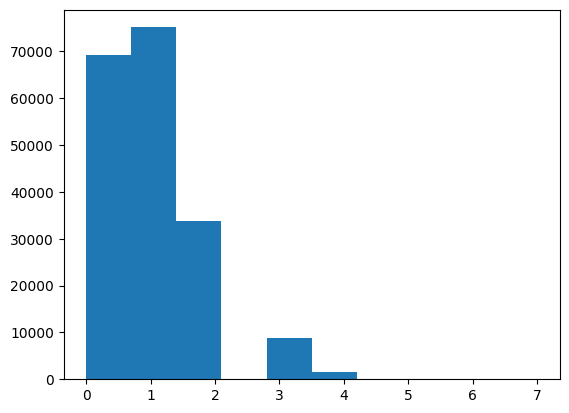

In [309]:

plt.hist(raw_data.isnull().sum(axis=1))

In [310]:
nul_vals=pd.DataFrame(raw_data.isnull().sum(),columns=["total nulvalues"])
nul_vals["percent"]=raw_data.isnull().sum()/len(raw_data)
nul_vals

,total nulvalues,percent
Age,19488,0.103338
Gender,19538,0.103603
Blood Type,19540,0.103614
BMI,0,0.000000
Temperature,19519,0.103502
Heart Rate,19541,0.103619
Blood Pressure,19523,0.103524
Cholesterol,19519,0.103502
Diabetes,19550,0.103667
Smoking,19544,0.103635


In [311]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
y_data=raw_data[["Blood Pressure"]]
x_data=raw_data.drop(["Blood Pressure"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.2,random_state=42)
numXT_imputer=SimpleImputer(strategy="mean")
numXTr_data=numXT_imputer.fit_transform(x_train[["Age","Temperature","Heart Rate","Cholesterol"]])
numXTst_data=numXT_imputer.transform(x_test[["Age","Temperature","Heart Rate","Cholesterol"]])

cat_imputer=SimpleImputer(strategy="most_frequent")
catXTr_data=cat_imputer.fit_transform(x_train[["Gender","Blood Type","Diabetes","Smoking"]])
catXTst_data=cat_imputer.transform(x_test[["Gender","Blood Type","Diabetes","Smoking"]])

numYT_imputer=SimpleImputer(strategy="mean")
numYTr_data=numYT_imputer.fit_transform(y_train[["Blood Pressure"]])
numYTst_data=numYT_imputer.transform(y_test[["Blood Pressure"]])





In [312]:
pd.DataFrame(numXTr_data,columns=["Age","Temperature","Heart Rate","Cholesterol"])


,Age,Temperature,Heart Rate,Cholesterol
0,32.000000,98.826269,85.0,184.000000
1,26.016411,98.737286,76.0,180.000000
2,20.000000,98.600728,67.0,199.000000
3,25.000000,98.108731,97.0,184.481552
4,28.000000,99.052162,93.0,135.000000
...,...,...,...,...
37712,26.016411,98.901395,64.0,216.000000
37713,29.000000,98.960579,85.0,191.000000
37714,32.000000,98.785688,99.0,199.000000
37715,20.000000,98.677497,96.0,184.000000


In [313]:
num_data

array([[ 18.        ,  98.60118156,  95.        , 109.        ,
        203.        ],
       [ 26.02641209,  98.71497675,  93.        , 104.        ,
        163.        ],
       [ 34.        ,  98.71497675,  93.        , 104.        ,
        163.        ],
       ...,
       [ 30.        ,  98.08951639,  73.        , 108.        ,
        143.        ],
       [ 21.        ,  98.60118156,  71.        ,  98.        ,
        176.        ],
       [ 24.        ,  99.17068488,  65.        , 121.        ,
        130.        ]])